In [1]:
import os 
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, HDBSCAN
from umap import UMAP
from scipy.integrate import simpson

from src.GaussianMixture import gaussian_mixture

In [2]:
path = r"src/Noise"
file_name = r'Noise'
data = np.load(f'{path}/{file_name}.npy')
#data = data[0,:,400_000:500_000]
#emb = np.load(f'{path}/emb.npy')
#data.shape

### UMAP

In [3]:
#emb = UMAP(n_components=2).fit_transform(data.T)
#np.save(f'{path}/emb_UMAP.npy', emb)
emb = np.load(f'{path}/emb_UMAP.npy')

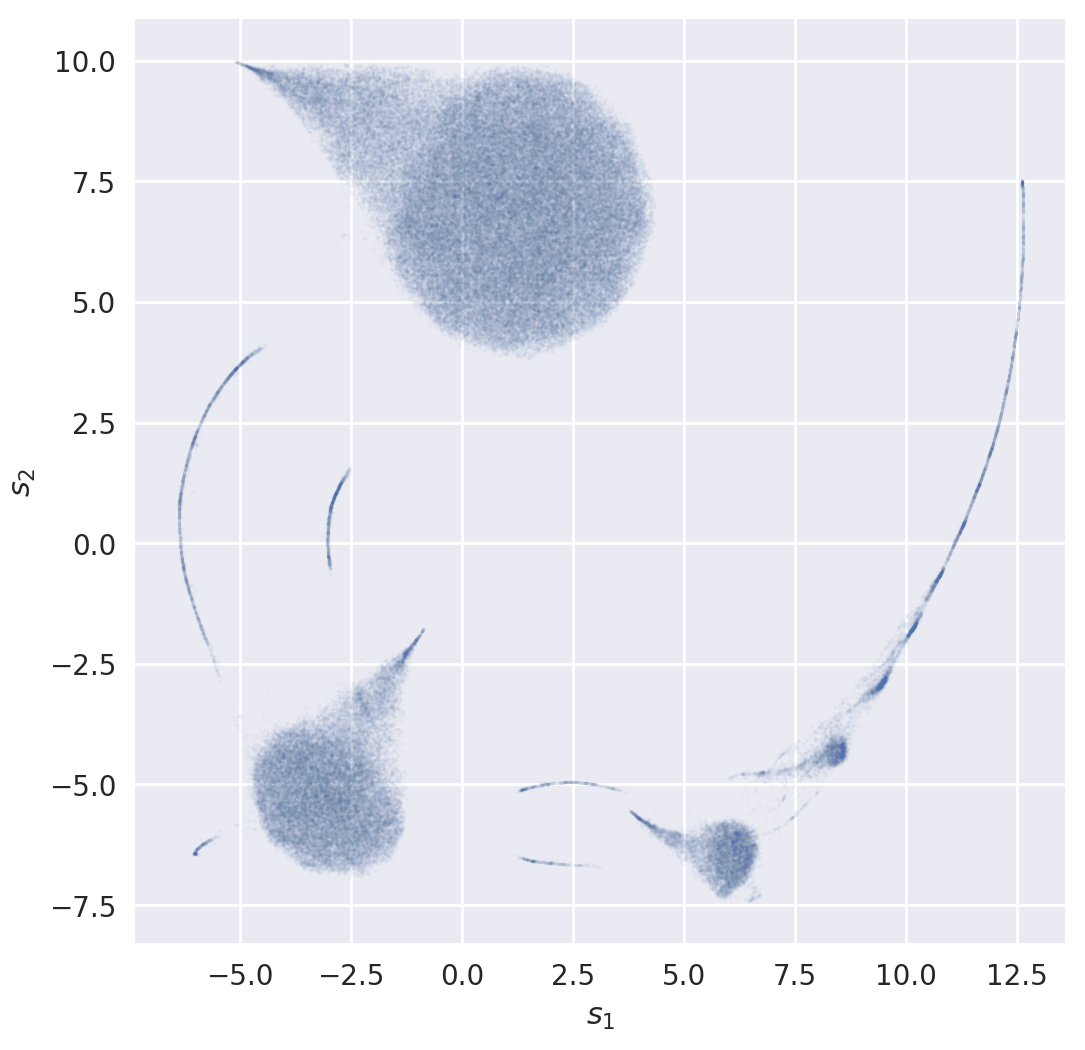

In [4]:
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(6,6), dpi=200)
    plt.scatter(emb[:,0], emb[:,1], s=1, alpha=0.02)
    plt.xlabel(r'$s_1$')
    plt.ylabel(r'$s_2$')
    #plt.show()
    plt.savefig(f'{path}/noiseUMAP.png', format='png', bbox_inches='tight')

In [5]:
gm = gaussian_mixture(X_low = emb,
                      X_high = data.T,
                      number_cluster = 28,
                      cluster_iter = 1,
                      means_init = None,
                      tol = 1e-1,
                      width_plot = 8,
                      height_plot = 3)

/home/nicolasdc/anaconda3/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


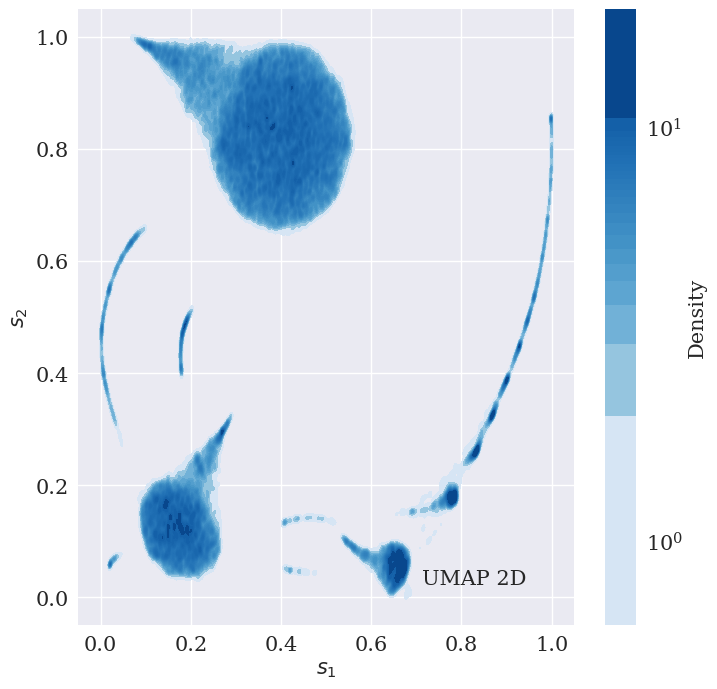

In [6]:
gm.plot_density(bw_adjust = 0.1,
                plot_gaussians = False,
                text = "UMAP 2D",
                save_path = 'src/Noise/',
                cluster_number = False)

In [7]:
# db = HDBSCAN(min_cluster_size=50,
#              min_samples=None,
#              cluster_selection_epsilon=0.14,
#              max_cluster_size=None,
#              metric='euclidean',
#              metric_params=None,
#              alpha=1.0,
#              algorithm='auto',
#              leaf_size=40,
#              n_jobs=None,
#              cluster_selection_method='eom',
#              allow_single_cluster=False,
#              store_centers=None,
#              copy=False)
# labels = db.fit_predict(emb)
# np.save(f'{path}/labels_UMAP.npy', labels)

In [8]:
# labels = np.load(f'{path}/labels_UMAP.npy')
# color = iter(cm.plasma(np.linspace(0, 1, 9)))
# with plt.style.context("seaborn-v0_8"):
#     plt.figure(figsize=(6,6))
#     for i in range(10):
#         if i == 7:
#             continue
#         if i % 9 == 0:
#             color = iter(cm.plasma(np.linspace(0, 1, 9)))
#         condition = labels == i
#         plt.scatter(emb[condition,0], emb[condition,1], alpha=0.05, s=1, c=next(color))

#     plt.xlabel(r'$s_1$')
#     plt.ylabel(r'$s_2$')
#     plt.ylim((-10,11))
#     plt.xlim((-8,15))
#     plt.savefig(f'src/Noise/scatterNoiseUMAP.png', format='png', bbox_inches='tight')
#     plt.show()

In [9]:
# with plt.style.context("seaborn-v0_8"):
#     for i in range(10):
#         condition = labels == i
#         data_ = data[:,condition]
#         plt.figure(figsize=(6,3))
#         plt.plot(data_[:,:np.min([data_.shape[1], 1000])], alpha=0.1, linewidth=1)#, c=color[i])
#         plt.ylabel(r'$Voltage$ $(a.u.)$')
#         plt.xlabel(r'$Time$ $(a.u.)$')
#         plt.ylim((-0.01, 0.05))
#         plt.savefig(f'src/Noise/ClusterUMAP/cluster{i}.pdf', format='pdf', bbox_inches='tight')
#         plt.show()

### PCA 

In [3]:
emb = PCA(n_components=2).fit_transform(data.T)
np.save(f'{path}/emb_PCA2D.npy', emb)

/home/nicolasdc/anaconda3/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


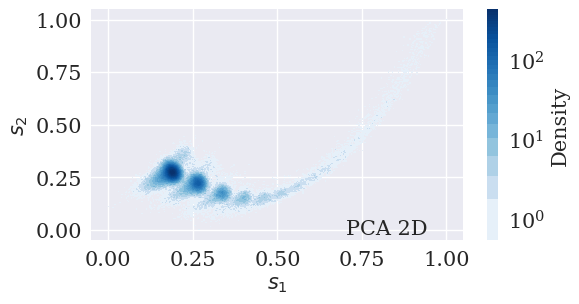

In [5]:
gm = gaussian_mixture(X_low = emb,
                      X_high = data.T,
                      number_cluster = 28,
                      cluster_iter =1,
                      means_init = None,
                      tol = 1e-1,
                      width_plot = 6,
                      height_plot = 3)
gm.plot_density(bw_adjust = 0.1,
                plot_gaussians = False,
                text = "PCA 2D",
                save_path = 'src/Noise/',
                cluster_number = False)

In [12]:
emb = PCA(n_components=1).fit_transform(data.T)
np.save(f'{path}/emb_PCA1D.npy', emb)

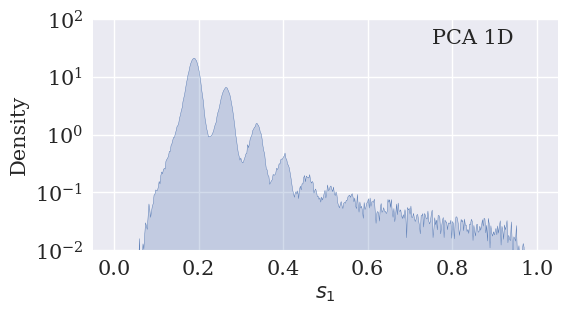

In [15]:
gm = gaussian_mixture(X_low = emb,
                      X_high = data.T,
                      number_cluster = 28,
                      cluster_iter = 5,
                      means_init = None,
                      tol = 1e-4,
                      width_plot = 6,
                      height_plot = 3)
gm.plot_density(bw_adjust = 0.09,
                plot_gaussians = False,
                text = "PCA 1D",
                save_path = 'src/Noise/',
                cluster_number = False)